<a href="https://colab.research.google.com/github/Chiko020292/student_project2/blob/main/TugasProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
ls

drive/  sample_data/


In [12]:
ls drive/MyDrive/dataset/

'emails (1).csv'   emails.csv   TugasProject2.ipynb


In [13]:
#Import Packages

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns #visual
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs

In [14]:
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/dataset/emails.csv'
df=pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [15]:
df.shape

(5172, 3002)

In [16]:
df.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [18]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [19]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

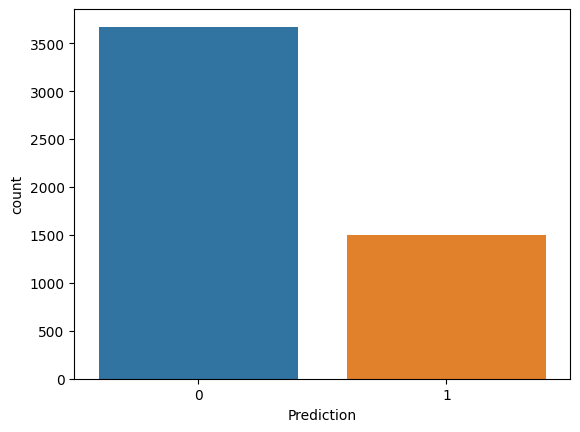

In [19]:
sns.countplot(data=df, x='Prediction')
plt.show()

In [20]:
x = df.iloc[:,1:3001]
x

y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 1, 0])

In [21]:
# 1. Logistic Regression
logistic = SGDClassifier(loss="log")
print(logistic.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [22]:
# Train model
logistic.fit(x, y)

print(f"Model weights: {logistic.coef_}, bias: {logistic.intercept_}")

# test
y_pred = logistic.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Model weights: [[-96.15613498 -77.40309796 -73.43830412 ...  -3.20772787 -37.15957958
   -3.25355256]], bias: [332.81136055]


In [23]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3672
           1       0.95      0.83      0.89      1500

    accuracy                           0.94      5172
   macro avg       0.94      0.91      0.92      5172
weighted avg       0.94      0.94      0.94      5172



In [24]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y, y_pred)
cnf_matrix

array([[3613,   59],
       [ 252, 1248]])

Text(0.5, 427.9555555555555, 'Predicted Label')

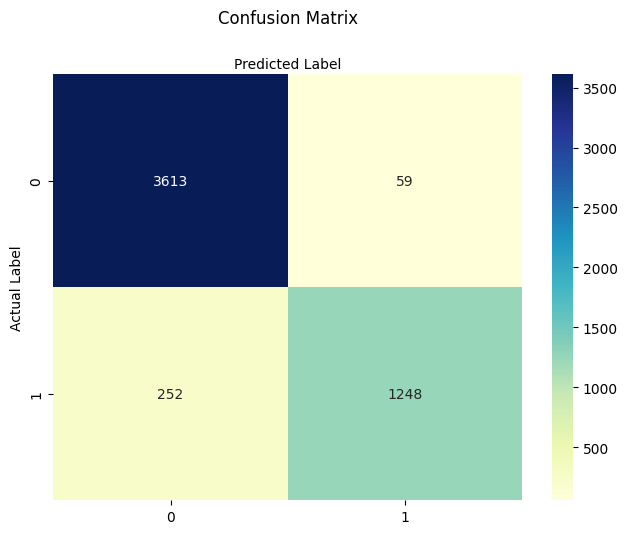

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [27]:
# accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print("Precision:", metrics.precision_score(y, y_pred))
print("Recall:", metrics.recall_score(y, y_pred))
print("F1-Score:", metrics.f1_score(y, y_pred))

Accuracy: 0.9398685228151585
Precision: 0.954858454475899
Recall: 0.832
F1-Score: 0.8892055575347346


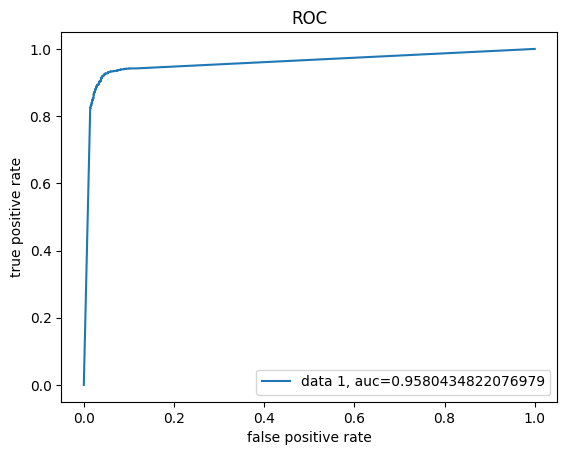

In [28]:
y_pred_proba = logistic.predict_proba(x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

In [29]:
#2. Model k-Nearest Neighbors
from sklearn.model_selection import train_test_split
     

In [30]:
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)
from sklearn.neighbors import KNeighborsClassifier

# classifier to Nearest Neighbors
n_neighbors = 22
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
print(clf.get_params())

# Train model
clf.fit(trainx, trainy)

# test
y_pred_knn = clf.predict(testx)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


[[816  96]
 [ 94 287]]


Text(0.5, 427.9555555555555, 'Predicted Label')

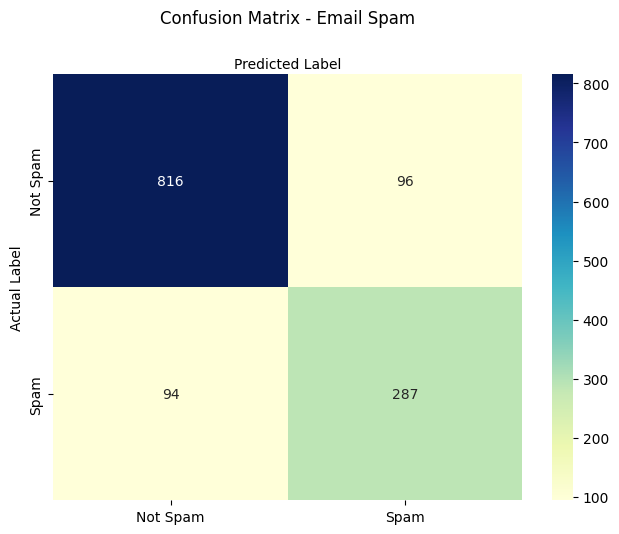

In [32]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testy, y_pred_knn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Email Spam', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [33]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_knn))
print("Precision:", metrics.precision_score(testy, y_pred_knn))
print("Recall:", metrics.recall_score(testy, y_pred_knn))
print("F1-Score:", metrics.f1_score(testy, y_pred_knn))

Accuracy: 0.8530549110595514
Precision: 0.7493472584856397
Recall: 0.7532808398950132
F1-Score: 0.7513089005235603


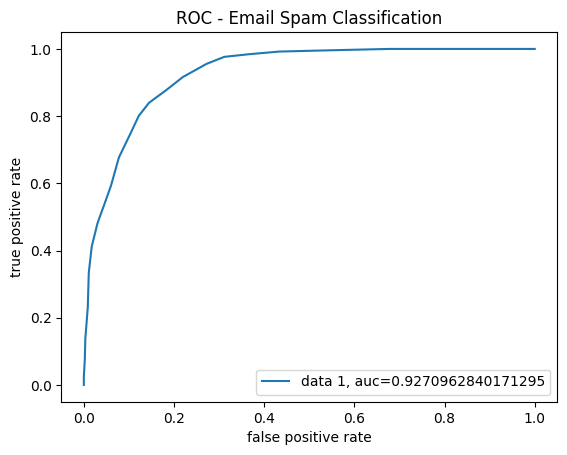

In [34]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_proba)
auc = metrics.roc_auc_score(testy, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification')
plt.legend(loc=4)
plt.show()

In [35]:
# 3. Decision Trees

trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)

#Get dataset
from sklearn.tree import DecisionTreeClassifier

# Create classifier to DecisionTreeClassifier
clf_dtree = DecisionTreeClassifier()
print(clf_dtree.get_params())

# Train model
clf_dtree.fit(trainx, trainy)

# test
y_pred_dtree = clf_dtree.predict(testx)
     

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[[859  57]
 [ 31 346]]


Text(0.5, 427.9555555555555, 'Predicted Label')

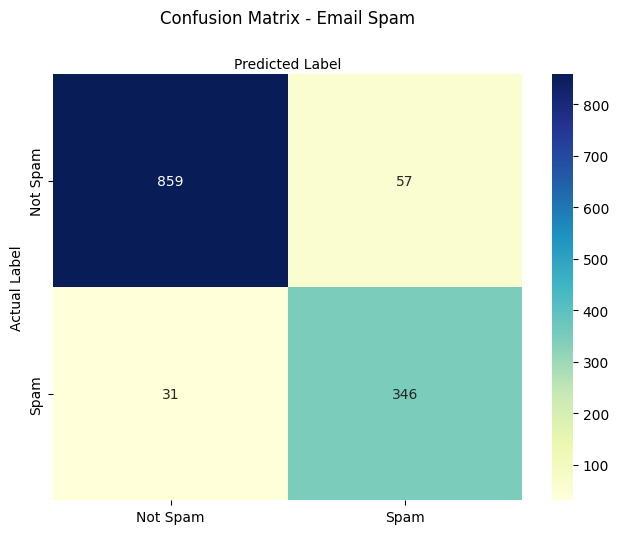

In [36]:
# confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testy, y_pred_dtree)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Email Spam', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [37]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_dtree))
print("Precision:", metrics.precision_score(testy, y_pred_dtree))
print("Recall:", metrics.recall_score(testy, y_pred_dtree))
print("F1-Score:", metrics.f1_score(testy, y_pred_dtree))

Accuracy: 0.9319412219644239
Precision: 0.858560794044665
Recall: 0.9177718832891246
F1-Score: 0.8871794871794871


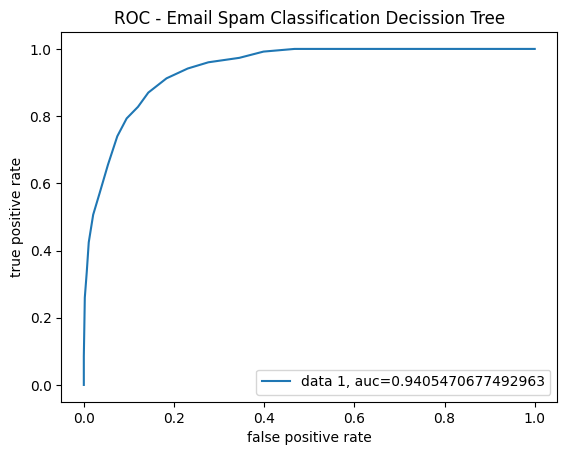

In [39]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_proba)
auc = metrics.roc_auc_score(testy, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification Decission Tree')
plt.legend(loc=4)
plt.show()

In [21]:
#4. Support Vector Machine

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)

# buat classifier untuk Nearest Neighbors
n_neighbors = 22
clf = KNeighborsClassifier(n_neighbors, weights='uniform')
print(clf.get_params())

# Train model
clf.fit(trainx, trainy)

# test
y_pred_knn = clf.predict(testx)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 22, 'p': 2, 'weights': 'uniform'}


[[819  82]
 [ 99 293]]


Text(0.5, 427.9555555555555, 'Predicted Label')

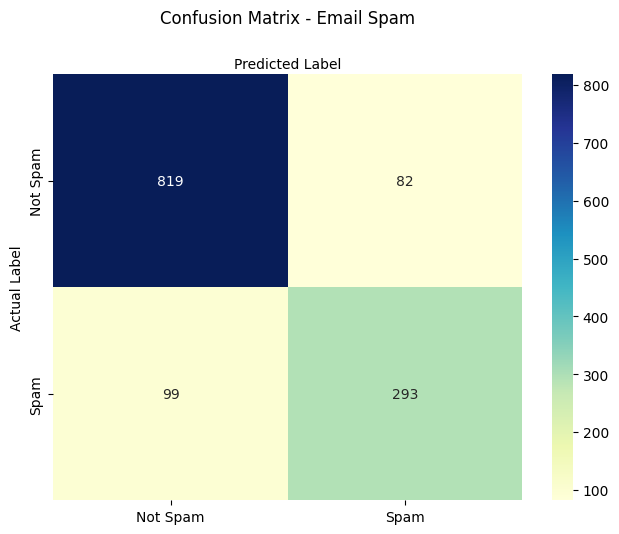

In [24]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testy, y_pred_knn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Email Spam', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [25]:
print("Accuracy:", metrics.accuracy_score(testy, y_pred_knn))
print("Precision:", metrics.precision_score(testy, y_pred_knn))
print("Recall:", metrics.recall_score(testy, y_pred_knn))
print("F1-Score:", metrics.f1_score(testy, y_pred_knn))

Accuracy: 0.860015467904099
Precision: 0.7813333333333333
Recall: 0.7474489795918368
F1-Score: 0.7640156453715775


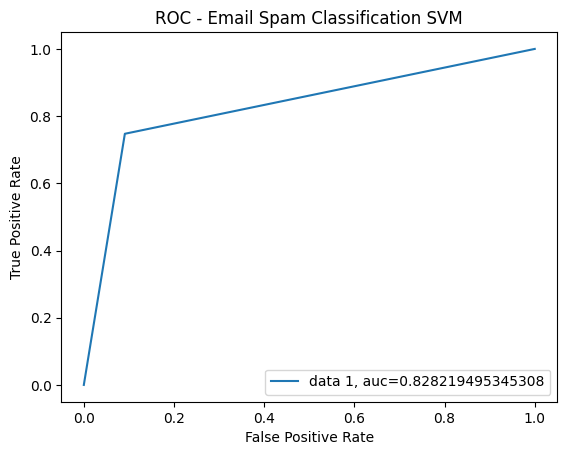

In [29]:
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_knn)
auc = metrics.roc_auc_score(testy, y_pred_knn)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Email Spam Classification SVM')
plt.legend(loc=4)
plt.show()

In [30]:
#5. Naive Bayes

from sklearn.naive_bayes import GaussianNB

trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)

clf = GaussianNB()
print(clf.get_params())

# Train model
clf.fit(trainx, trainy)

# test
y_pred_NB = clf.predict(testx)

{'priors': None, 'var_smoothing': 1e-09}


[[863  42]
 [ 15 373]]


Text(0.5, 427.9555555555555, 'Predicted Label')

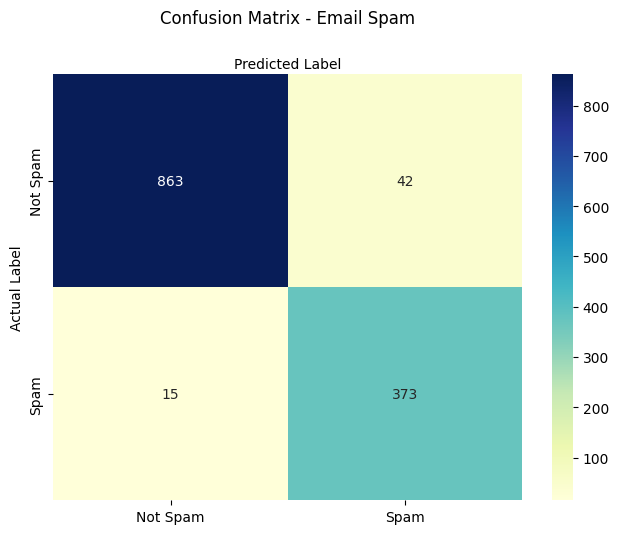

In [32]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(testy, y_pred_NB)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix - Email Spam', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [33]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_NB))
print("Precision:", metrics.precision_score(testy, y_pred_NB))
print("Recall:", metrics.recall_score(testy, y_pred_NB))
print("F1-Score:", metrics.f1_score(testy, y_pred_NB))

Accuracy: 0.9559164733178654
Precision: 0.8987951807228916
Recall: 0.961340206185567
F1-Score: 0.9290161892901618


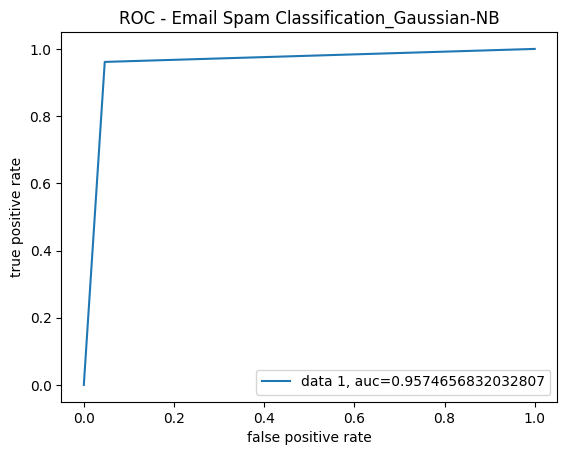

In [34]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_NB)
auc = metrics.roc_auc_score(testy, y_pred_NB)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_Gaussian-NB')
plt.legend(loc=4)
plt.show()

In [37]:
#6. Neural Network

from sklearn.neural_network import MLPClassifier

trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25)
     
clf = MLPClassifier(hidden_layer_sizes=(200,150,50),
                    max_iter = 100000,activation = 'relu',
                    solver = 'adam')
print(clf.get_params())

# Train model
clf.fit(trainx, trainy)

# test
y_pred_nn = clf.predict(testx)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 150, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


[[896  26]
 [  9 362]]


Text(0.5, 427.9555555555555, 'Predicted label')

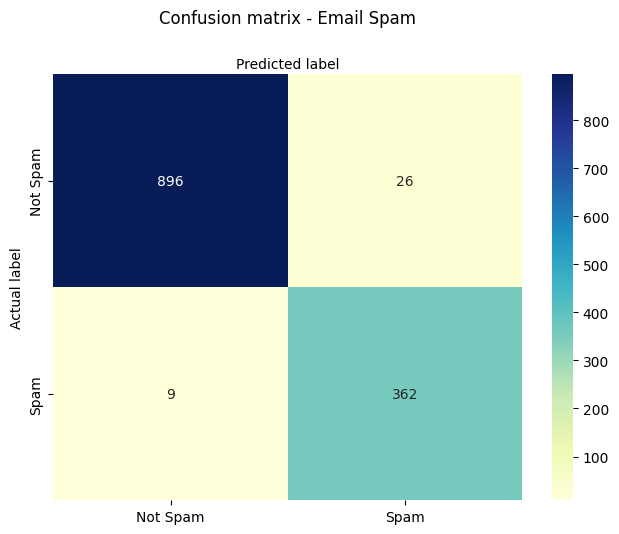

In [36]:
# confusion_matrix
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(testy, y_pred_nn)
print(cnf_matrix)

class_names=['Not Spam','Spam'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Email Spam', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
# accuracy, precision, dan recall
print("Accuracy:", metrics.accuracy_score(testy, y_pred_nn))
print("Precision:", metrics.precision_score(testy, y_pred_nn))
print("Recall:", metrics.recall_score(testy, y_pred_nn))
print("F1-Score:", metrics.f1_score(testy, y_pred_nn))

Accuracy: 0.979891724671307
Precision: 0.9680851063829787
Recall: 0.9629629629629629
F1-Score: 0.9655172413793103


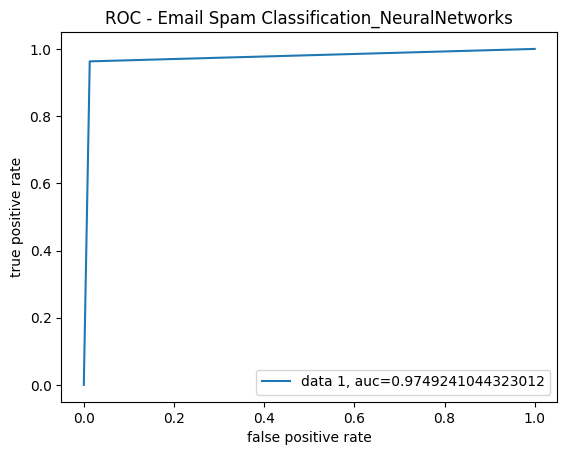

In [39]:
# ROC
y_pred_proba = clf.predict_proba(testx)[::,1]
fpr, tpr, _ = metrics.roc_curve(testy,  y_pred_nn)
auc = metrics.roc_auc_score(testy, y_pred_nn)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC - Email Spam Classification_NeuralNetworks')
plt.legend(loc=4)
plt.show()